# Competition stage 1

For the first stage of the competition, your task is to fill in the gaps in this notebook.
You will need to implement several code cells to complete a machine learning pipeline.

This notebook requires the following packages:

- scikit-learn ([Documentation](https://scikit-learn.org/stable/modules/classes.html))
- numpy ([Documentation](https://numpy.org/doc/stable/))
- matplotlib ([Documentation](https://matplotlib.org/contents.html))
- pandas ([Documentation](https://pandas.pydata.org/docs/))

## 1. Preparation

For reproduceability, we set some random seeds. Like in the rest of the notebook, you are expected to fill in the gaps.

In [40]:
import numpy as np
import random

numpy_seed = 0
python_seed = 0

np.random.seed(numpy_seed)
random.seed(python_seed)

## 2. Loading the data set

We have already implemented a data loader class for you, to spare you some time on parsing the data.
The data loader reads three CSV files:

- features_train.csv: pre-extracted features for the training set
- metadata_train.csv: labels and other meta-data for the training set
- features_test.csv: pre-extracted features for the test set

The data loader loads these files into memory for you.

In [41]:
# Required imports go here
import glob
import os
import numpy as np
import pandas as pd

class DataLoader(object):
    """Loads the training and test set into memory."""
    def __init__(self, root_path):
        """Initialize the data loader.
        
        :param root_path: The path to the 'data_histograms/' directory  
        """
        self.root_path = root_path
    
    def load_train(self):
        """Loads the entire training set into memory.
        
        Returns a dataframe. The index consists of the sample ids.
        The features are represented as columns: R0 through R255 for the red channel histogram,
        G0 through G255 for the green channel histogram, and B0 through B255 for the blue channel histogram.
        
        Finally, there are columns indicating the superclass, class label, and pole id.
        
        Example:
        
            R0  R1  R2  R3  R4  R5  R6  R7  R8  R9  ...  B249  B250  B251  B252  \
        Id                                          ...                           
        1    0   0   0   0   0   0   0   0   0   0  ...     0     0     0     0   
        2    0   0   0   1   0   1   0   1   1   1  ...     0     1     2     0   
        3    6   1   5   7   9   4  16   6  13  15  ...  3338  4323  5706  7702   

            B253   B254   B255    Superclass  Class  Pole  
        Id                                                  
        1       0      0      0         other      m  1044  
        2       0      0      2  blue_circles     D7  2136  
        3   10108  11101  40459         other    F29  1805  
        
        :return: See above  
        """
        df_features = pd.read_csv(os.path.join(self.root_path, 'features_train.csv'), index_col='Id')
        df_meta = pd.read_csv(os.path.join(self.root_path, 'metadata_train.csv'), index_col='Id')
        
        df_train = df_features.merge(df_meta, left_index=True, right_index=True)
        
        return df_train
    
    def load_test(self):
        """Loads the entire test set into memory.
        
        Returns a dataframe. The index consists of the sample ids.
        The features are represented as columns: R0 through R255 for the red channel histogram,
        G0 through G255 for the green channel histogram, and B0 through B255 for the blue channel histogram.
        
        Unlike the training set, no metadata is supplied.
        
        :return: See above
        """
        df_features = pd.read_csv(os.path.join(self.root_path, 'features_test.csv'), index_col='Id')
        
        return df_features

In [42]:
root_path = "/Users/a_gemmel/Documents/UGent/master/2e_master/machlearn/competition/stage1/"

data_loader = DataLoader(root_path)

df_train = data_loader.load_train()
df_test = data_loader.load_test()

df_train.head()

,R0,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,B249,B250,B251,B252,B253,B254,B255,Superclass,Class,Pole
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,other,m,1044
2,0,0,0,1,0,1,0,1,1,1,...,0,1,2,0,0,0,2,blue_circles,D7,2136
3,6,1,5,7,9,4,16,6,13,15,...,3338,4323,5706,7702,10108,11101,40459,other,F29,1805
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,5,other,F1,509
5,2,4,3,5,10,11,12,19,39,54,...,2,5,2,2,1,1,3,blue_circles,D7,922


## 3. Exploring the dataset

### 3.1. Visualizing some features

Here, you will visualize the colour histogram of some of the training samples. You can use the helper function `plot_histogram` in 'helpers.py'.

Note that you can obtain the histogram features for a given channel by indexing the dataframe using column indices. We know that the first 256 columns correspond to the red channel, followed by green and then blue.

So for a given sample, you can extract the histograms as such:

```
red = df_train.iloc[sample_index, :256].to_numpy()
green = df_train.iloc[sample_index, 256:512].to_numpy()
blue = df_train.iloc[sample_index, 512:768].to_numpy()
```

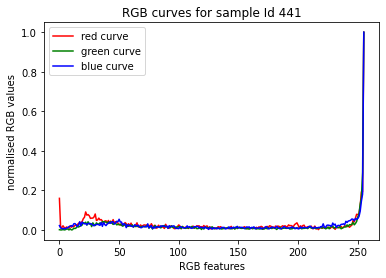

In [43]:
# Required imports go here
import matplotlib.pyplot as plt
%matplotlib inline

def plot_RGBcurve(axis, histogram, color_name):
    """Plots a single histogram on a given axis.

    :param axis: A matplotlib axis object  
    :param histogram: A histogram loaded from the provided JSON files  
    :param color_name: One of 'red', 'green' and 'blue'  
    """
    bins = np.arange(256)
    axis.plot(bins, histogram / histogram.max(), color=color_name, label=color_name + " curve")

# Visualize the three (R, G, B) histograms for some training samples here
sample_index = 441
red = df_train.iloc[sample_index-1, :256].to_numpy()
green = df_train.iloc[sample_index-1, 256:512].to_numpy()
blue = df_train.iloc[sample_index-1, 512:768].to_numpy()

fig_hist, ax_hist = plt.subplots()
ax_hist.set_title("RGB curves for sample Id {}".format(sample_index))
ax_hist.set_xlabel("RGB features")
ax_hist.set_ylabel("normalised RGB values")
plot_RGBcurve(ax_hist, red, "red")
plot_RGBcurve(ax_hist, green, "green")
plot_RGBcurve(ax_hist, blue, "blue")
ax_hist.legend()
fig_hist.savefig("RGB{}".format(sample_index))


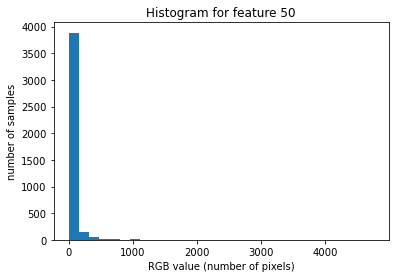

In [44]:
# Required imports go here
import matplotlib.pyplot as plt
%matplotlib inline

def plot_histogram(axis, histogram):
    """Plots a single histogram on a given axis.

    :param axis: A matplotlib axis object  
    :param histogram: A histogram loaded from the provided JSON files  
    :param color_name: One of 'red', 'green' and 'blue'  
    """
    bins = 30
    axis.hist(histogram, bins)

# Visualize the histogram for a specific feature (feature distribution)
feature_index = 50
feature = df_train.iloc[:,feature_index-1]
fig_feat, ax_feat = plt.subplots()
ax_feat.set_title("Histogram for feature {}".format(feature_index))
ax_feat.set_xlabel("RGB value (number of pixels)")
ax_feat.set_ylabel("number of samples")
plot_histogram(ax_feat, feature)

### 3.2. Visualizing the class distribution

Here, visualize the class distribution in the training set.

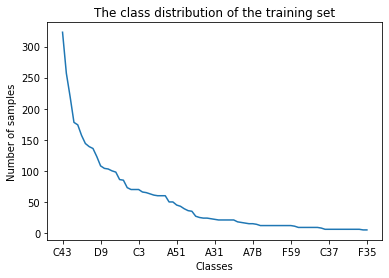

In [45]:
# Required imports go here
import matplotlib.pyplot as plt
%matplotlib inline

# Create a plot showing the class distribution in the training set
fig_distr, ax_distr = plt.subplots()
ax_distr.set_title("The class distribution of the training set")
ax_distr.set_xlabel("Classes")
ax_distr.set_ylabel("Number of samples")
ax_distr.set_xticks(ticks=np.arange(0, 100, 10), minor=False)
ax_distr.plot(df_train['Class'].value_counts());

## 4. Preparing for scikit-learn

We must prepare our data to a format that works for scikit-learn. We must convert our features to a multi-dimensional numpy array, and our labels to integers.

In [46]:
# Required imports go here
from sklearn.preprocessing import LabelEncoder

# This is the class order expected in the submission files. 
# Make sure that you properly encode these such that 
# the order in your submission files is correct!
classes_str = ['A13', 'A14', 'A15', 'A1AB', 'A1CD', 'A23', 'A23_yellow', 'A25', 'A29', 'A31', 
               'A51', 'A7A', 'A7B', 'B1', 'B11', 'B15A', 'B17', 'B19', 'B21', 'B3', 'B5', 'B7',
               'B9', 'C1', 'C11', 'C21', 'C23', 'C29', 'C3', 'C31', 'C35', 'C37', 'C43', 'D10',
               'D1a', 'D1b', 'D1e', 'D5', 'D7', 'D9', 'E1', 'E3', 'E5', 'E7', 'E9a',
               'E9a_miva', 'E9b', 'E9cd', 'E9e', 'F1', 'F12a', 'F12b', 'F13', 'F19', 'F1a_h', 
               'F21', 'F23A', 'F25', 'F27', 'F29', 'F31', 'F33_34', 'F35', 'F3a_h', 'F41', 
               'F43', 'F45', 'F47', 'F49', 'F4a', 'F4b', 'F50', 'F59', 'F87', 'Handic', 'X', 
               'begin', 'e0c', 'end', 'lang', 'm']
label_enc = LabelEncoder()
label_enc.fit(classes_str)

# create groups for superclasses
superclasses_str = ['blue_circles', 'diamonds', 'forbidden', 'other', 'rectangles_down',
                 'rectangles_up', 'red_blue_circles', 'red_circles', 'reversed_triangles',
                     'squares', 'stop', 'triangles']
superlabel_enc = LabelEncoder()
superlabel_enc.fit(superclasses_str)
superclasses_arr = superlabel_enc.transform(df_train.iloc[:, 768].to_numpy())
# create groups for every pole id (samples that are correlated)
# take a look at samples with the same class but different pole ids
groups_poles = df_train.iloc[:, 770].to_numpy()

# Create X_train, y_train, X_test, and any other required arrays here
X_train = df_train.iloc[:, :768].to_numpy()
X_test = df_test.to_numpy()
y_train = label_enc.transform(df_train.iloc[:, 769].to_numpy()) # numerical labels

ids_test = df_test.index

print('Number of training samples: ', X_train.shape[0])
print('Number of test samples: ', X_test.shape[0])
print('Number of features: ', X_train.shape[1])
print('Number of classes: ', len(classes_str))

Number of training samples:  4146
Number of test samples:  4293
Number of features:  768
Number of classes:  81


## 5. Cross-validation

Cross-validation will allow you to evaluate your model's performance on unseen data.
You have several options at your disposal:

- [Stratified KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html)
- [Group KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GroupKFold.html#sklearn.model_selection.GroupKFold)
- One of the [other options](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection)
- Or perhaps something else entirely?

Reason about the properties of the dataset and make an informed choice. Then implement your choice below.

## 6. Pipeline

You will now create the scikit-learn pipeline.

### 6.1. An untuned linear model

First you will train an untuned linear model, that is, a linear model with default hyperparameters on the entire training set.
Make sure to use the correct scorer.

In [47]:
# Required imports go here (pick a linear model of your choice)
from sklearn.pipeline import Pipeline
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import cross_validate
from collections import Counter, defaultdict

def stratified_group_k_fold(X, y, groups, k, seed=45):
    """Custom cross validation method
    Stratified: folds are made by preserving the percentage of samples for each class. 
    Grouped: The same group will not appear in two different folds.
    
    :param X: An array of shape (n_samples, n_features)  
    :param y: An array of shape (n_samples,)  
    :return: train and test indices
    """
    labels_num = np.max(y) + 1
    y_counts_per_group = defaultdict(lambda: np.zeros(labels_num))
    y_distr = Counter()
    for label, g in zip(y, groups):
        y_counts_per_group[g][label] += 1
        y_distr[label] += 1

    y_counts_per_fold = defaultdict(lambda: np.zeros(labels_num))
    groups_per_fold = defaultdict(set)

    def eval_y_counts_per_fold(y_counts, fold):
        y_counts_per_fold[fold] += y_counts
        std_per_label = []
        for label in range(labels_num):
            label_std = np.std([y_counts_per_fold[i][label] / y_distr[label] for i in range(k)])
            std_per_label.append(label_std)
        y_counts_per_fold[fold] -= y_counts
        return np.mean(std_per_label)
    
    groups_and_y_counts = list(y_counts_per_group.items())
    random.Random(seed).shuffle(groups_and_y_counts)

    for g, y_counts in sorted(groups_and_y_counts, key=lambda x: -np.std(x[1])):
        best_fold = None
        min_eval = None
        for i in range(k):
            fold_eval = eval_y_counts_per_fold(y_counts, i)
            if min_eval is None or fold_eval < min_eval:
                min_eval = fold_eval
                best_fold = i
        y_counts_per_fold[best_fold] += y_counts
        groups_per_fold[best_fold].add(g)

    all_groups = set(groups)
    for i in range(k):
        train_groups = all_groups - groups_per_fold[i]
        test_groups = groups_per_fold[i]

        train_indices = [i for i, g in enumerate(groups) if g in train_groups]
        test_indices = [i for i, g in enumerate(groups) if g in test_groups]

        yield train_indices, test_indices

def neg_logloss_scorer(estimator, X, y):
    """Scores the predictions of given estimator on X against y.

    Since scikit-learn's default behaviour is to maximize a score function,
    returns negative log loss.

    :param estimator: A scikit-learn estimator with support for predict_proba()  
    :param X: An array of shape (n_samples, n_features)  
    :param y: An array of shape (n_samples,)  
    :return: The negative log loss
    """
    prob = estimator.predict_proba(X)
    loss = log_loss(y, prob, labels=estimator.classes_) # returns negative log loss (minimize)
    return -loss # returns positive log loss (maximize)

# List the sklearn modules in your pipeline here in the following format: 
# steps = [('name1',function1()),...] 
# list of tuples: step 1, step 2 ... , final step (classifier) in pipeline
# introduce a linear classification model
# Create a pipeline object with the necessary steps here
# Create a model instance (this is a model object that can be trained, tuned and used)
pipeline = Pipeline([('scaler', MinMaxScaler()),
            ('lr_classifier', LogisticRegression(solver='lbfgs', max_iter=125, n_jobs=3))])
             
# Perform cross-validation to obtain an estimate of your model's performance
# cross validation (e.g. StratifiedKFold) is used to calculate scores
# but folds are NOT part of your model (estimator, pipeline)
folds = 5
#skf = StratifiedKFold(n_splits=folds) # this is a class object
#gkf = GroupKFold(n_splits=folds)
sgkf = stratified_group_k_fold(X_train, y_train, groups_poles, k=folds)
scores = cross_validate(pipeline, X_train, y_train, groups=groups_poles,
                            cv=sgkf, scoring=neg_logloss_scorer, return_train_score=True)

train_score_mean = np.mean(scores['train_score'])
train_score_std = np.std(scores['train_score'])
cv_score_mean = np.mean(scores['test_score'])
cv_score_std = np.std(scores['test_score'])

print('Training score {} +/- {}'.format(train_score_mean, train_score_std))
print('Cross-validation score: {} +/- {}'.format(cv_score_mean, cv_score_std))

Training score -2.9297922769539517 +/- 0.04872766468593147
Cross-validation score: -3.4676272982088037 +/- 0.11739047795919003


### 6.2. A tuned linear model

Now you will properly tune the hyperparameters of your linear model and the rest of your pipeline. In this case, you will perform a grid search. You are also allowed to perform other hyperparameter searches, for this simply modify the code below.

In [52]:
# Required imports go here
from sklearn.model_selection import GridSearchCV

folds = 5
pipeline = Pipeline([('scaler', RobustScaler(quantile_range=(5.0, 95.0))),
             ('classifier', LogisticRegression(solver='lbfgs', max_iter=125, n_jobs=3))])

# gridsearch is used to finetune parameters (e.g. max_iter, C) of the model
# grid = [{'name1': [param_val1], 'name2': [param_val2], ...}, {second model dictionary}]
param_grid = [{'classifier__C': np.array([10**i for i in range(-5, 5)])}]
#param_grid = [{'classifier__C': np.array([1.5, 1.7, 1.9, 2.1, 2.3])}]

# perform grid search for parameter grid
# note that scoring is done by negative log loss function
# note that cross-validation is done default by stratified kfolds
# this can be altered by providing indices of a different cross validation scheme
sgkf = stratified_group_k_fold(X_train, y_train, groups_poles, k=folds)
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=sgkf,
                               scoring=neg_logloss_scorer, n_jobs=3, verbose=True, 
                                   return_train_score=True)

# Perform the grid search and collect results
grid_search.fit(X_train, y_train, groups=groups_poles)

# implement a plot of results: error in function of hyperparameter value
# maximum corresponds to best value of the parameter
print("Grid scores on training data set:")
cv_means = grid_search.cv_results_['mean_test_score']
cv_stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(cv_means, cv_stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

# display best parameter set
print("Best parameters set found on development set: ", grid_search.best_params_)
print('')
# display best estimator (model) with finetuned parameters
estimator = grid_search.best_estimator_
print('Obtained pipeline:', estimator)
print('')

# Perform cross-validation to obtain an estimate of your best model's performance
sgkf = stratified_group_k_fold(X_train, y_train, groups_poles, k=folds)
scores_grid_search = cross_validate(estimator, X_train, y_train, groups=groups_poles,
                                        cv=sgkf, scoring=neg_logloss_scorer, 
                                            return_train_score=True)

train_score_mean = np.mean(scores_grid_search['train_score'])
train_score_std = np.std(scores_grid_search['train_score'])
cv_score_mean = np.mean(scores_grid_search['test_score'])
cv_score_std = np.std(scores_grid_search['test_score'])

print('Training score: {} +/- {}'.format(train_score_mean, train_score_std))
print('Cross-validation score: {} +/- {}'.format(cv_score_mean, cv_score_std))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  2.8min
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:  3.2min finished


Grid scores on training data set:
-3.818 (+/-0.222) for {'classifier__C': 1e-05}
-3.726 (+/-0.225) for {'classifier__C': 0.0001}
-3.533 (+/-0.241) for {'classifier__C': 0.001}
-3.474 (+/-0.307) for {'classifier__C': 0.01}
-4.082 (+/-0.495) for {'classifier__C': 0.1}
-5.883 (+/-0.854) for {'classifier__C': 1.0}
-9.414 (+/-0.746) for {'classifier__C': 10.0}
-13.193 (+/-0.379) for {'classifier__C': 100.0}
-15.048 (+/-1.285) for {'classifier__C': 1000.0}
-15.229 (+/-1.201) for {'classifier__C': 10000.0}
Best parameters set found on development set:  {'classifier__C': 0.01}

Obtained pipeline: Pipeline(steps=[('scaler', RobustScaler(quantile_range=(5.0, 95.0))),
                ('classifier',
                 LogisticRegression(C=0.01, max_iter=125, n_jobs=3))])

Training score: -2.508683260746713 +/- 0.0268946239447993
Cross-validation score: -3.474372719377641 +/- 0.1535672375020199


### 6.3. Model evaluation

Now, evaluate your model by plotting a learning curve and one or more confusion matrices.

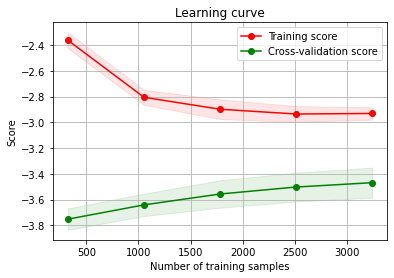

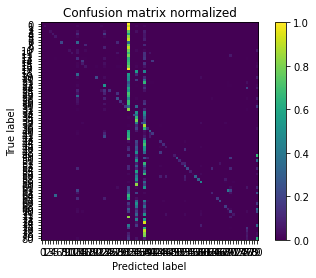

In [49]:
# Required imports go here
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_learning_curve(learning_curve_result, title):
    """Plots a learning curve that you have pre-computed. 
    Training and cross validation scores in function of the amount of samples:
    important for the BIAS and VARIANCE of the model!
    
    :param learning_curve_result: The result of a call to learning_curve(...)
    :param title: Title of the resulting plot
    """
    train_sizes, train_scores, test_scores = learning_curve_result

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    fig = plt.figure()
    ax = fig.gca()

    ax.grid()
    ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1,
                    color="r")
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.1,
                    color="g")
    
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r",
            label="Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g",
        label="Cross-validation score")
    ax.set_ylabel('Score')
    ax.legend(loc="best")
    ax.set_xlabel('Number of training samples')
    ax.set_title(title)

def plot_confusion_matrix(confusion_matrix_result, title):
    """Plots a confusion matrix that you have pre-computed. 
    Is the model confusing two classes? I.e. the model mislables a as b and vice versa:
    false positives, false negatives, ...
    
    :param confusion_matrix_result: The result of a call to confusion_matrix(...)
    :param title: Title of the resulting plot
    """
    fig = plt.figure()
    ax = fig.gca()
    ax.set_title(title)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_result)
    disp.plot(include_values=False, ax=ax)

# train best model using all training data
# watch out; here the model is trained on all data and then predicts all data
# this causes leakage: don't use these values quantitatively!!!
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_train)

# calculate learning curve and confusion matrix
sgkf = stratified_group_k_fold(X_train, y_train, groups_poles, k=folds)
learn_curv = learning_curve(estimator, X_train, y_train, train_sizes=np.linspace(.1, 1.0, 5),
                                cv=sgkf, groups=groups_poles, scoring=neg_logloss_scorer, n_jobs=3)
conf_matr = confusion_matrix(y_train, y_pred, normalize='true') # normalised
# unnormalised (contains different information)

# Plot your figures here
plot_learning_curve(learn_curv, 'Learning curve')
plot_confusion_matrix(conf_matr, 'Confusion matrix normalized')

## 7. Submitting to Kaggle

Finally, re-train the best estimator and create a submission file for Kaggle.

In [50]:
# Required imports go here
import csv
from collections import Counter

def create_submission(classes, ids, probabilities, path):
    """Creates a submission file on the given path.

    :param classes: The list of classes in the order that Kaggle expects  
    :param ids: The ids of the test set
    :param probabilities: The output of estimator.predict_proba(); 
    the order should correspond to classes  
    :param path: The path to the output CSV file  
    """
    p = probabilities.tolist()
    with open(path, 'w') as out:
        writer = csv.writer(out, delimiter=',')
        writer.writerow(['Id', *classes])
        for i in range(len(p)):
            writer.writerow([ids[i], *[str(e) for e in p[i]]])
            

# Tip: submit the uniform probability and prior probability benchmarks
# to make sure the submission code works properly.
# These should have the same score as the benchmarks on the leaderboard.
uniform_prob = np.ones((len(df_test), 81)) / 81 # 81 classes
create_submission(classes_str, ids_test, uniform_prob, 'uniform_submission.csv')
prior_prob = np.zeros_like(uniform_prob)
counter = Counter(y_train)
for c in range(81):
    prior_prob[:, c] = counter[c] / len(y_train)
create_submission(classes_str, ids_test, prior_prob, 'prior_submission.csv')

# Here is where we create the submission for your estimator
submission_path = "/Users/a_gemmel/Documents/UGent/master/2e_master/machlearn/competition/stage1/"
output_probabilities = estimator.predict_proba(X_test)
create_submission(classes_str, ids_test, output_probabilities, 'submission7.csv')